In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [303]:
import plotly.express as px

In [4]:
wine = pd.read_csv('winequalityN.csv')

In [5]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
wine.loc[:, 'type'].value_counts()/wine.shape[0]

white    0.753886
red      0.246114
Name: type, dtype: float64

In [8]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
# Reemplazando los valores nulos por su media

In [10]:
wine.loc[pd.isnull(wine['fixed acidity']), 'fixed acidity'] = np.mean(wine['fixed acidity'])

In [11]:
wine.loc[pd.isnull(wine['volatile acidity']), 'volatile acidity'] = np.mean(wine['volatile acidity'])

In [12]:
wine.loc[pd.isnull(wine['citric acid']), 'citric acid'] = np.mean(wine['citric acid'])

In [13]:
wine.loc[pd.isnull(wine['residual sugar']), 'residual sugar'] = np.mean(wine['residual sugar'])

In [14]:
wine.loc[pd.isnull(wine['chlorides']), 'chlorides'] = np.mean(wine['chlorides'])

In [15]:
wine.loc[pd.isnull(wine['pH']), 'pH'] = np.mean(wine['pH'])

In [16]:
wine.loc[pd.isnull(wine['sulphates']), 'sulphates'] = np.mean(wine['sulphates'])

In [290]:
# Ejercicio 1
# Limpiando variables numericas
# Limpiando valores apiticos - fixed acidity

In [18]:
w = wine.loc[(wine['type']=='red') | (wine['type']=='white'), ['fixed acidity']]

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

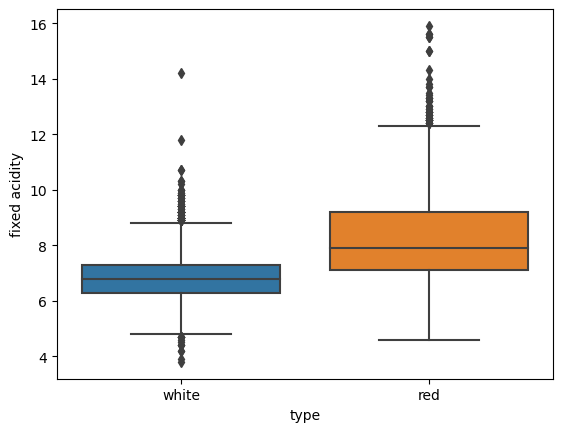

In [19]:
sns.boxplot( data=wine.loc[ (wine['type']=='white') | (wine['type'] == 'red'), : ]  , x="type" , y="fixed acidity" )

In [20]:
np.mean(w['fixed acidity'])

7.216579312471082

In [21]:
q1 = np.quantile(w , 0.25 )
q3 = np.quantile(w , 0.75 )

In [22]:
q1

6.4

In [23]:
q3

7.7

In [24]:
iqr = q3 - q1

In [25]:
iqr

1.2999999999999998

In [26]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [27]:
upper_bound

9.65

In [28]:
lower_bound

4.450000000000001

In [29]:
w.loc[(w['fixed acidity'] > upper_bound) | (w['fixed acidity'] < lower_bound) , : ]

,fixed acidity
98,9.8
169,9.8
207,10.2
358,10.0
873,10.3
...,...
6368,10.0
6372,9.9
6374,9.9
6441,11.1


In [30]:
wq1 = wine.loc[ : , ["type","fixed acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wq1.columns = ["type","fixed acidity q1"]

In [31]:
wq3 = wine.loc[ : , ["type","fixed acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wq3.columns = ["type","fixed acidity q3"]

In [32]:
wmean = wine.loc[ : , ["type","fixed acidity"] ].groupby( ["type"] , as_index = False ).mean()
wmean.columns = ["type","fixed acidity mean"]

In [33]:
w_iqr = wq1.merge( wq3 , on=["type"] , how="inner" ).merge( wmean , on=["type"] , how="inner" )

In [34]:
w_iqr["iqr"] = w_iqr.apply( lambda r: r["fixed acidity q3"] - r["fixed acidity q1"] , axis = 1)

In [35]:
w_iqr["upper"] = w_iqr.apply( lambda r: ( r["fixed acidity q3"] + 1.5*r["iqr"] ) , axis = 1)
w_iqr["lower"] = w_iqr.apply( lambda r: ( r["fixed acidity q1"] - 1.5*r["iqr"] ) , axis = 1)

In [36]:
w_iqr

,type,fixed acidity q1,fixed acidity q3,fixed acidity mean,iqr,upper,lower
0,red,7.1,9.2,8.320721,2.1,12.35,3.95
1,white,6.3,7.3,6.856121,1.0,8.80,4.80


In [37]:
w_t = wine.merge(w_iqr , on=["type"] , how="left" ).copy()

In [38]:
w_t

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity q1,fixed acidity q3,fixed acidity mean,iqr,upper,lower
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,6.3,7.3,6.856121,1.0,8.80,4.80
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,6.3,7.3,6.856121,1.0,8.80,4.80
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,6.3,7.3,6.856121,1.0,8.80,4.80
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,6.3,7.3,6.856121,1.0,8.80,4.80
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,6.3,7.3,6.856121,1.0,8.80,4.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,7.1,9.2,8.320721,2.1,12.35,3.95
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,7.1,9.2,8.320721,2.1,12.35,3.95
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,7.1,9.2,8.320721,2.1,12.35,3.95
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,7.1,9.2,8.320721,2.1,12.35,3.95


In [39]:
def getfixed_acidity(r):
    if ( r["fixed acidity"] <= r["lower"] ) | ( r["fixed acidity"] >= r["upper"] ):
        return r["fixed acidity mean"]
    else:
        return r["fixed acidity"]

In [40]:
w_t.apply( lambda r: getfixed_acidity(r) , axis = 1 )

0       7.0
1       6.3
2       8.1
3       7.2
4       7.2
       ... 
6492    6.2
6493    5.9
6494    6.3
6495    5.9
6496    6.0
Length: 6497, dtype: float64

In [41]:
w_t['new fixed acidity'] = w_t.apply( lambda r: getfixed_acidity(r) , axis = 1 )

In [42]:
w_t

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity q1,fixed acidity q3,fixed acidity mean,iqr,upper,lower,new fixed acidity
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,6.3,7.3,6.856121,1.0,8.80,4.80,7.0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,6.3,7.3,6.856121,1.0,8.80,4.80,6.3
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,6.3,7.3,6.856121,1.0,8.80,4.80,8.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,6.3,7.3,6.856121,1.0,8.80,4.80,7.2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,6.3,7.3,6.856121,1.0,8.80,4.80,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,7.1,9.2,8.320721,2.1,12.35,3.95,6.2
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,7.1,9.2,8.320721,2.1,12.35,3.95,5.9
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,7.1,9.2,8.320721,2.1,12.35,3.95,6.3
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,7.1,9.2,8.320721,2.1,12.35,3.95,5.9


<AxesSubplot:xlabel='type', ylabel='new fixed acidity'>

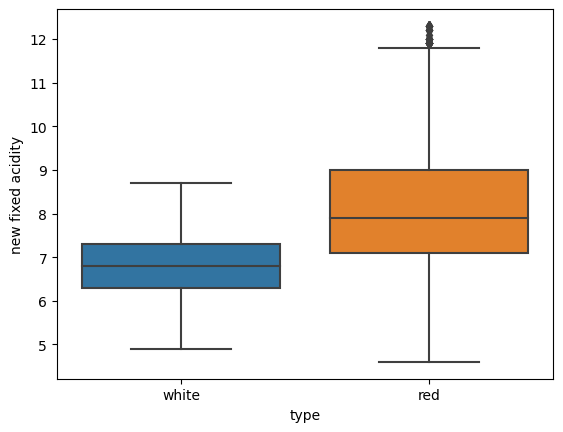

In [43]:
sns.boxplot( data=w_t.loc[ (w_t['type']=='white') | (w_t['type'] == 'red'), : ]  , x="type" , y="new fixed acidity" )

In [44]:
#Limpiando valores apiticos - volatile acidity

In [45]:
w = wine.loc[(wine['type']=='red') | (wine['type']=='white'), ['volatile acidity']]

<AxesSubplot:xlabel='type', ylabel='volatile acidity'>

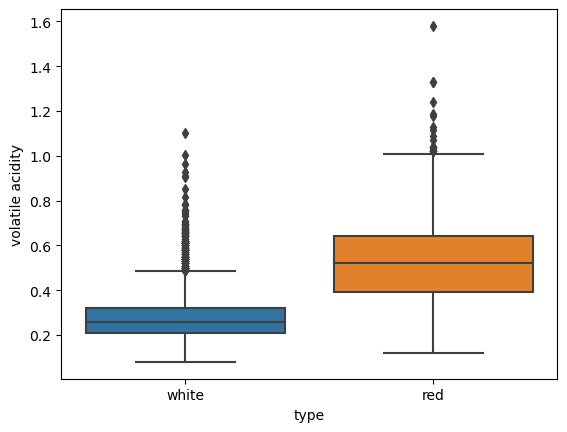

In [46]:
sns.boxplot( data=wine.loc[ (wine['type']=='white') | (wine['type'] == 'red'), : ]  , x="type" , y="volatile acidity" )

In [47]:
np.mean(w['volatile acidity'])

0.3396910155648025

In [48]:
q1 = np.quantile(w , 0.25 )
q3 = np.quantile(w , 0.75 )

In [49]:
q1

0.23

In [50]:
q3

0.4

In [51]:
iqr = q3 - q1

In [52]:
iqr

0.17

In [53]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [54]:
upper_bound

0.655

In [55]:
lower_bound

-0.024999999999999994

In [56]:
w.loc[(w['volatile acidity'] > upper_bound) | (w['volatile acidity'] < lower_bound) , : ]

,volatile acidity
17,0.660
20,0.660
23,0.670
178,0.670
221,0.685
...,...
6475,0.700
6476,0.670
6480,0.715
6487,0.725


In [57]:
wq1 = wine.loc[ : , ["type","volatile acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wq1.columns = ["type","volatile acidity q1"]

In [58]:
wq3 = wine.loc[ : , ["type","volatile acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wq3.columns = ["type","volatile acidity q3"]

In [59]:
wmean = wine.loc[ : , ["type","volatile acidity"] ].groupby( ["type"] , as_index = False ).mean()
wmean.columns = ["type","volatile acidity mean"]

In [60]:
w_iqr = wq1.merge( wq3 , on=["type"] , how="inner" ).merge( wmean , on=["type"] , how="inner" )

In [61]:
w_iqr["iqr"] = w_iqr.apply( lambda r: r["volatile acidity q3"] - r["volatile acidity q1"] , axis = 1)

In [62]:
w_iqr["upper"] = w_iqr.apply( lambda r: ( r["volatile acidity q3"] + 1.5*r["iqr"] ) , axis = 1)
w_iqr["lower"] = w_iqr.apply( lambda r: ( r["volatile acidity q1"] - 1.5*r["iqr"] ) , axis = 1)

In [63]:
w_iqr

,type,volatile acidity q1,volatile acidity q3,volatile acidity mean,iqr,upper,lower
0,red,0.39,0.64,0.52762,0.25,1.015,0.015
1,white,0.21,0.32,0.27834,0.11,0.485,0.045


In [64]:
w_t1 = wine.merge(w_iqr , on=["type"] , how="left" ).copy()

In [65]:
w_t1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile acidity q1,volatile acidity q3,volatile acidity mean,iqr,upper,lower
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0.21,0.32,0.27834,0.11,0.485,0.045
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0.21,0.32,0.27834,0.11,0.485,0.045
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0.21,0.32,0.27834,0.11,0.485,0.045
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.21,0.32,0.27834,0.11,0.485,0.045
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.21,0.32,0.27834,0.11,0.485,0.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0.39,0.64,0.52762,0.25,1.015,0.015
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0.39,0.64,0.52762,0.25,1.015,0.015
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0.39,0.64,0.52762,0.25,1.015,0.015
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0.39,0.64,0.52762,0.25,1.015,0.015


In [66]:
def getvolatile_acidity(r):
    if ( r["volatile acidity"] <= r["lower"] ) | ( r["volatile acidity"] >= r["upper"] ):
        return r["volatile acidity mean"]
    else:
        return r["volatile acidity"]

In [67]:
w_t1['new volatile acidity'] = w_t1.apply( lambda r: getvolatile_acidity(r) , axis = 1 )

In [68]:
w_t1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile acidity q1,volatile acidity q3,volatile acidity mean,iqr,upper,lower,new volatile acidity
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0.21,0.32,0.27834,0.11,0.485,0.045,0.270
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0.21,0.32,0.27834,0.11,0.485,0.045,0.300
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0.21,0.32,0.27834,0.11,0.485,0.045,0.280
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.21,0.32,0.27834,0.11,0.485,0.045,0.230
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.21,0.32,0.27834,0.11,0.485,0.045,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0.39,0.64,0.52762,0.25,1.015,0.015,0.600
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0.39,0.64,0.52762,0.25,1.015,0.015,0.550
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0.39,0.64,0.52762,0.25,1.015,0.015,0.510
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0.39,0.64,0.52762,0.25,1.015,0.015,0.645


In [210]:
w_t1=w_t1.drop(['type'], axis=1)

In [211]:
w_t1

,new volatile acidity
0,0.270
1,0.300
2,0.280
3,0.230
4,0.230
...,...
6492,0.600
6493,0.550
6494,0.510
6495,0.645


<AxesSubplot:xlabel='type', ylabel='new volatile acidity'>

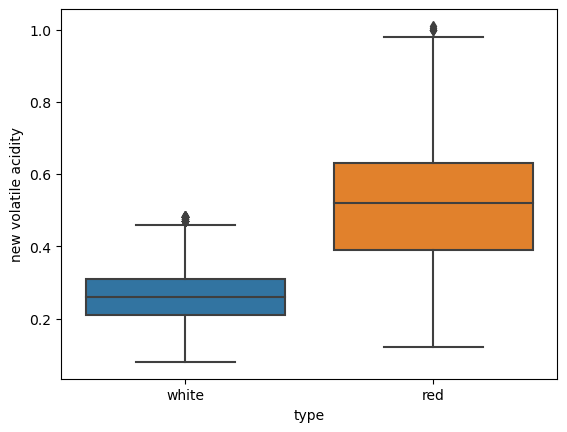

In [221]:
sns.boxplot( data=wineclean.loc[ (wineclean['type']=='white') | (wineclean['type'] == 'red'), : ]  , x="type" , y="new volatile acidity" )

In [78]:
#Limpiando valores apiticos - citric acid

In [79]:
w = wine.loc[(wine['type']=='red') | (wine['type']=='white'), ['citric acid']]

<AxesSubplot:xlabel='type', ylabel='citric acid'>

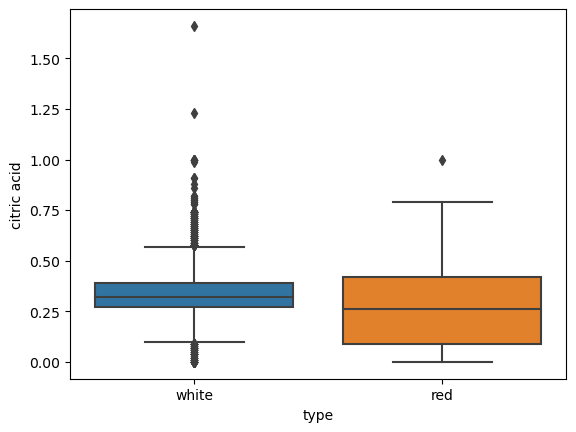

In [80]:
sns.boxplot( data=wine.loc[ (wine['type']=='white') | (wine['type'] == 'red'), : ]  , x="type" , y="citric acid" )

In [81]:
np.mean(w['citric acid'])

0.3187218971358124

In [82]:
q1 = np.quantile(w , 0.25 )
q3 = np.quantile(w , 0.75 )

In [83]:
q1

0.25

In [84]:
q3

0.39

In [85]:
iqr = q3 - q1

In [86]:
iqr

0.14

In [87]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [88]:
upper_bound

0.6000000000000001

In [89]:
lower_bound

0.03999999999999998

In [90]:
w.loc[(w['citric acid'] > upper_bound) | (w['citric acid'] < lower_bound) , : ]

,citric acid
14,0.62
65,0.03
84,0.61
85,0.62
86,0.63
...,...
6455,0.02
6463,0.02
6464,0.64
6472,0.78


In [91]:
wq1 = wine.loc[ : , ["type","citric acid"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wq1.columns = ["type","citric acid q1"]

In [92]:
wq3 = wine.loc[ : , ["type","citric acid"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wq3.columns = ["type","citric acid q3"]

In [93]:
wmean = wine.loc[ : , ["type","citric acid"] ].groupby( ["type"] , as_index = False ).mean()
wmean.columns = ["type","citric acid mean"]

In [94]:
w_iqr = wq1.merge( wq3 , on=["type"] , how="inner" ).merge( wmean , on=["type"] , how="inner" )

In [95]:
w_iqr["iqr"] = w_iqr.apply( lambda r: r["citric acid q3"] - r["citric acid q1"] , axis = 1)

In [96]:
w_iqr["upper"] = w_iqr.apply( lambda r: ( r["citric acid q3"] + 1.5*r["iqr"] ) , axis = 1)
w_iqr["lower"] = w_iqr.apply( lambda r: ( r["citric acid q1"] - 1.5*r["iqr"] ) , axis = 1)

In [107]:
w_t2 = wine.merge(w_iqr , on=["type"] , how="left" ).copy()

In [109]:
w_t2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric acid q1,citric acid q3,citric acid mean,iqr,upper,lower
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0.27,0.39,0.334244,0.12,0.570,0.090
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0.27,0.39,0.334244,0.12,0.570,0.090
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0.27,0.39,0.334244,0.12,0.570,0.090
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.27,0.39,0.334244,0.12,0.570,0.090
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.27,0.39,0.334244,0.12,0.570,0.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0.09,0.42,0.271175,0.33,0.915,-0.405
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0.09,0.42,0.271175,0.33,0.915,-0.405
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0.09,0.42,0.271175,0.33,0.915,-0.405
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0.09,0.42,0.271175,0.33,0.915,-0.405


In [110]:
def getcitric_acid(r):
    if ( r["citric acid"] <= r["lower"] ) | ( r["citric acid"] >= r["upper"] ):
        return r["citric acid mean"]
    else:
        return r["citric acid"]

In [111]:
w_t2['new citric acid'] = w_t2.apply( lambda r: getcitric_acid(r) , axis = 1 )

In [112]:
w_t2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric acid q1,citric acid q3,citric acid mean,iqr,upper,lower,new citric acid
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0.27,0.39,0.334244,0.12,0.570,0.090,0.36
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0.27,0.39,0.334244,0.12,0.570,0.090,0.34
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0.27,0.39,0.334244,0.12,0.570,0.090,0.40
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.27,0.39,0.334244,0.12,0.570,0.090,0.32
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.27,0.39,0.334244,0.12,0.570,0.090,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0.09,0.42,0.271175,0.33,0.915,-0.405,0.08
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0.09,0.42,0.271175,0.33,0.915,-0.405,0.10
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0.09,0.42,0.271175,0.33,0.915,-0.405,0.13
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0.09,0.42,0.271175,0.33,0.915,-0.405,0.12


In [223]:
w_t2=w_t2.drop(['type', 'citric acid q1', 'citric acid q3', 'citric acid mean', 'iqr', 'upper', 'lower', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol', 'quality'], axis=1)

In [224]:
w_t2

,new citric acid
0,0.36
1,0.34
2,0.40
3,0.32
4,0.32
...,...
6492,0.08
6493,0.10
6494,0.13
6495,0.12


<AxesSubplot:xlabel='type', ylabel='new citric acid'>

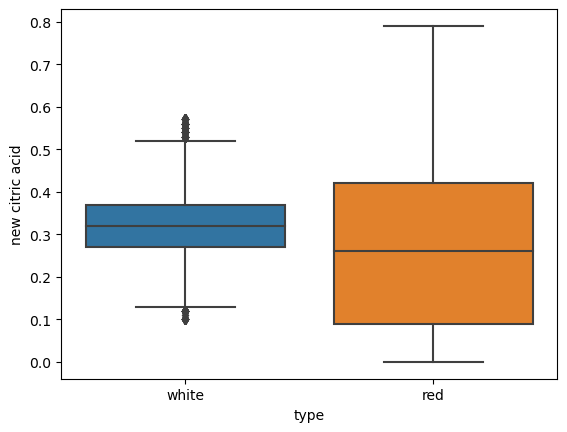

In [244]:
sns.boxplot( data=wineclean.loc[ (wineclean['type']=='white') | (wineclean['type'] == 'red'), : ]  , x="type" , y="new citric acid" )

In [103]:
#Limpiando valores apiticos - residual sugar

In [114]:
w = wine.loc[(wine['type']=='red') | (wine['type']=='white'), ['residual sugar']]

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

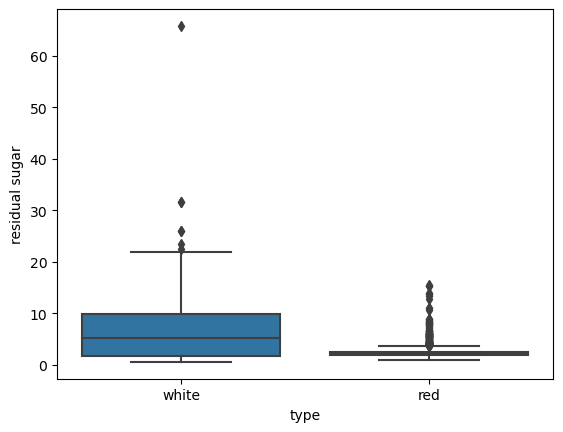

In [115]:
sns.boxplot( data=wine.loc[ (wine['type']=='white') | (wine['type'] == 'red'), : ]  , x="type" , y="residual sugar" )

In [116]:
np.mean(w['residual sugar'])

5.444326404926884

In [117]:
q1 = np.quantile(w , 0.25 )
q3 = np.quantile(w , 0.75 )

In [118]:
q1

1.8

In [119]:
q3

8.1

In [120]:
iqr = q3 - q1

In [121]:
iqr

6.3

In [122]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [123]:
upper_bound

17.549999999999997

In [124]:
lower_bound

-7.6499999999999995

In [125]:
w.loc[(w['residual sugar'] > upper_bound) | (w['residual sugar'] < lower_bound) , : ]

,residual sugar
0,20.70
7,20.70
14,19.25
38,17.95
39,17.95
...,...
4691,19.25
4694,19.25
4748,18.35
4749,18.40


In [126]:
wq1 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wq1.columns = ["type","residual sugar q1"]

In [127]:
wq3 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wq3.columns = ["type","residual sugar q3"]

In [128]:
wmean = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).mean()
wmean.columns = ["type","residual sugar mean"]

In [129]:
w_iqr = wq1.merge( wq3 , on=["type"] , how="inner" ).merge( wmean , on=["type"] , how="inner" )

In [130]:
w_iqr["iqr"] = w_iqr.apply( lambda r: r["residual sugar q3"] - r["residual sugar q1"] , axis = 1)

In [131]:
w_iqr["upper"] = w_iqr.apply( lambda r: ( r["residual sugar q3"] + 1.5*r["iqr"] ) , axis = 1)
w_iqr["lower"] = w_iqr.apply( lambda r: ( r["residual sugar q1"] - 1.5*r["iqr"] ) , axis = 1)

In [132]:
w_t3 = wine.merge(w_iqr , on=["type"] , how="left" ).copy()

In [133]:
w_t3

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar q1,residual sugar q3,residual sugar mean,iqr,upper,lower
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1.7,9.9,6.392862,8.2,22.20,-10.60
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1.7,9.9,6.392862,8.2,22.20,-10.60
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1.7,9.9,6.392862,8.2,22.20,-10.60
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1.7,9.9,6.392862,8.2,22.20,-10.60
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1.7,9.9,6.392862,8.2,22.20,-10.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1.9,2.6,2.538806,0.7,3.65,0.85
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1.9,2.6,2.538806,0.7,3.65,0.85
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,1.9,2.6,2.538806,0.7,3.65,0.85
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1.9,2.6,2.538806,0.7,3.65,0.85


In [134]:
def getresidual_sugar(r):
    if ( r["residual sugar"] <= r["lower"] ) | ( r["residual sugar"] >= r["upper"] ):
        return r["residual sugar mean"]
    else:
        return r["residual sugar"]

In [135]:
w_t3['new residual sugar'] = w_t3.apply( lambda r: getresidual_sugar(r) , axis = 1 )

In [136]:
w_t3

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar q1,residual sugar q3,residual sugar mean,iqr,upper,lower,new residual sugar
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1.7,9.9,6.392862,8.2,22.20,-10.60,20.7
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1.7,9.9,6.392862,8.2,22.20,-10.60,1.6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1.7,9.9,6.392862,8.2,22.20,-10.60,6.9
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1.7,9.9,6.392862,8.2,22.20,-10.60,8.5
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1.7,9.9,6.392862,8.2,22.20,-10.60,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1.9,2.6,2.538806,0.7,3.65,0.85,2.0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1.9,2.6,2.538806,0.7,3.65,0.85,2.2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,1.9,2.6,2.538806,0.7,3.65,0.85,2.3
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1.9,2.6,2.538806,0.7,3.65,0.85,2.0


In [226]:
w_t3=w_t3.drop(['type', 'residual sugar q1', 'residual sugar q3', 'residual sugar mean', 'iqr', 'upper', 'lower', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol', 'quality'], axis=1)

In [227]:
w_t3

,new residual sugar
0,20.7
1,1.6
2,6.9
3,8.5
4,8.5
...,...
6492,2.0
6493,2.2
6494,2.3
6495,2.0


<AxesSubplot:xlabel='type', ylabel='new residual sugar'>

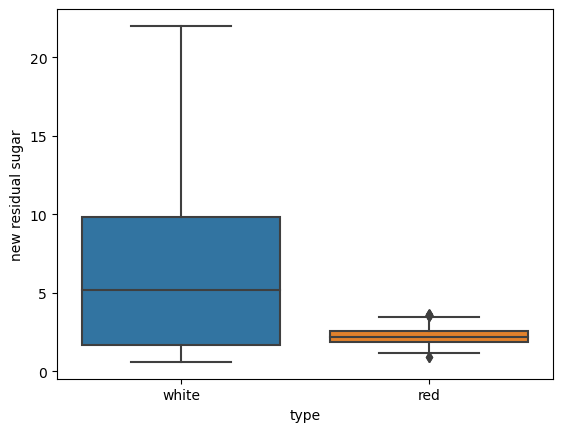

In [243]:
sns.boxplot( data=wineclean.loc[ (wineclean['type']=='white') | (wineclean['type'] == 'red'), : ]  , x="type" , y="new residual sugar" )

In [129]:
#Limpiando valores apiticos - chlorides

In [138]:
w = wine.loc[(wine['type']=='red') | (wine['type']=='white'), ['chlorides']]

<AxesSubplot:xlabel='type', ylabel='chlorides'>

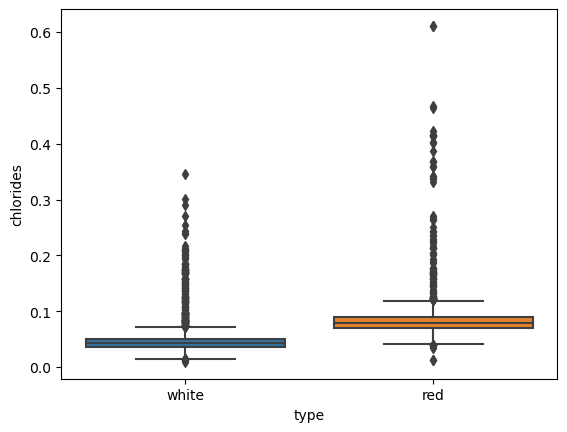

In [139]:
sns.boxplot( data=wine.loc[ (wine['type']=='white') | (wine['type'] == 'red'), : ]  , x="type" , y="chlorides" )

In [140]:
np.mean(w['chlorides'])

0.0560415704387993

In [141]:
q1 = np.quantile(w , 0.25 )
q3 = np.quantile(w , 0.75 )

In [142]:
q1

0.038

In [143]:
q3

0.065

In [144]:
iqr = q3 - q1

In [145]:
iqr

0.027000000000000003

In [146]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [147]:
upper_bound

0.10550000000000001

In [148]:
lower_bound

-0.002500000000000009

In [149]:
w.loc[(w['chlorides'] > upper_bound) | (w['chlorides'] < lower_bound) , : ]

,chlorides
40,0.172
41,0.173
54,0.147
194,0.200
195,0.197
...,...
6416,0.114
6417,0.106
6456,0.235
6468,0.230


In [150]:
wq1 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wq1.columns = ["type","chlorides q1"]

In [151]:
wq3 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wq3.columns = ["type","chlorides q3"]

In [152]:
wmean = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).mean()
wmean.columns = ["type","chlorides mean"]

In [153]:
w_iqr = wq1.merge( wq3 , on=["type"] , how="inner" ).merge( wmean , on=["type"] , how="inner" )

In [154]:
w_iqr["iqr"] = w_iqr.apply( lambda r: r["chlorides q3"] - r["chlorides q1"] , axis = 1)

In [155]:
w_iqr["upper"] = w_iqr.apply( lambda r: ( r["chlorides q3"] + 1.5*r["iqr"] ) , axis = 1)
w_iqr["lower"] = w_iqr.apply( lambda r: ( r["chlorides q1"] - 1.5*r["iqr"] ) , axis = 1)

In [156]:
w_t4 = wine.merge(w_iqr , on=["type"] , how="left" ).copy()

In [157]:
w_t4

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,chlorides q1,chlorides q3,chlorides mean,iqr,upper,lower
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0.036,0.05,0.045783,0.014,0.071,0.015
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0.036,0.05,0.045783,0.014,0.071,0.015
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0.036,0.05,0.045783,0.014,0.071,0.015
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.036,0.05,0.045783,0.014,0.071,0.015
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.036,0.05,0.045783,0.014,0.071,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0.070,0.09,0.087467,0.020,0.120,0.040
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0.070,0.09,0.087467,0.020,0.120,0.040
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0.070,0.09,0.087467,0.020,0.120,0.040
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0.070,0.09,0.087467,0.020,0.120,0.040


In [158]:
def getchlorides(r):
    if ( r["chlorides"] <= r["lower"] ) | ( r["chlorides"] >= r["upper"] ):
        return r["chlorides mean"]
    else:
        return r["chlorides"]

In [159]:
w_t4['new chlorides'] = w_t4.apply( lambda r: getchlorides(r) , axis = 1 )

In [160]:
w_t4

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,chlorides q1,chlorides q3,chlorides mean,iqr,upper,lower,new chlorides
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0.036,0.05,0.045783,0.014,0.071,0.015,0.045
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0.036,0.05,0.045783,0.014,0.071,0.015,0.049
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0.036,0.05,0.045783,0.014,0.071,0.015,0.050
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.036,0.05,0.045783,0.014,0.071,0.015,0.058
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.036,0.05,0.045783,0.014,0.071,0.015,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0.070,0.09,0.087467,0.020,0.120,0.040,0.090
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0.070,0.09,0.087467,0.020,0.120,0.040,0.062
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0.070,0.09,0.087467,0.020,0.120,0.040,0.076
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0.070,0.09,0.087467,0.020,0.120,0.040,0.075


In [229]:
w_t4=w_t4.drop(['type', 'chlorides q1', 'chlorides q3', 'chlorides mean', 'iqr', 'upper', 'lower', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol', 'quality'], axis=1)

In [230]:
w_t4

,new chlorides
0,0.045
1,0.049
2,0.050
3,0.058
4,0.058
...,...
6492,0.090
6493,0.062
6494,0.076
6495,0.075


<AxesSubplot:xlabel='type', ylabel='new chlorides'>

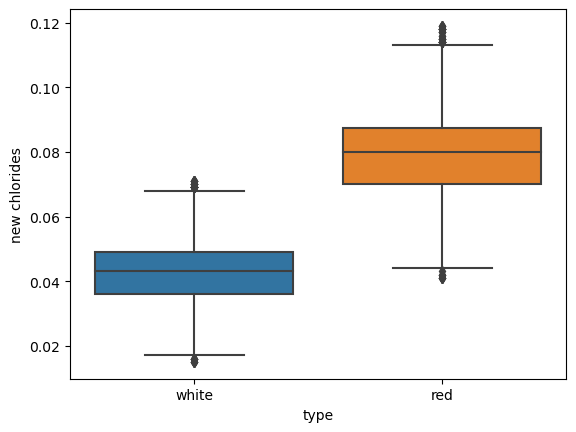

In [242]:
sns.boxplot( data=wineclean.loc[ (wineclean['type']=='white') | (wineclean['type'] == 'red'), : ]  , x="type" , y="new chlorides" )

In [157]:
#Limpiando valores apiticos - pH

In [162]:
w = wine.loc[(wine['type']=='red') | (wine['type']=='white'), ['pH']]

<AxesSubplot:xlabel='type', ylabel='pH'>

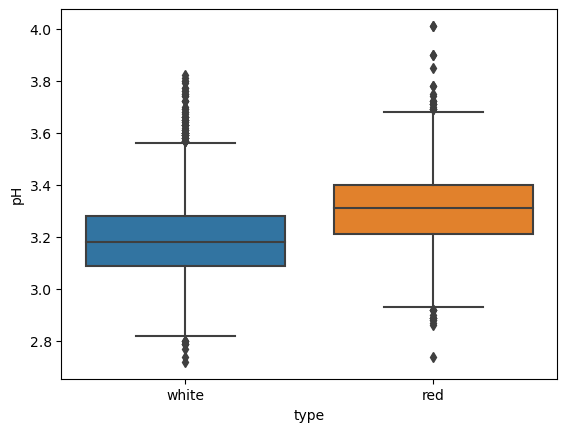

In [163]:
sns.boxplot( data=wine.loc[ (wine['type']=='white') | (wine['type'] == 'red'), : ]  , x="type" , y="pH" )

In [164]:
np.mean(w['pH'])

3.2183954993834734

In [165]:
q1 = np.quantile(w , 0.25 )
q3 = np.quantile(w , 0.75 )

In [166]:
q1

3.11

In [167]:
q3

3.32

In [168]:
iqr = q3 - q1

In [169]:
iqr

0.20999999999999996

In [170]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [171]:
upper_bound

3.635

In [172]:
lower_bound

2.795

In [173]:
w.loc[(w['pH'] > upper_bound) | (w['pH'] < lower_bound) , : ]

,pH
72,3.69
250,3.72
507,3.64
509,3.64
830,3.72
...,...
6275,3.71
6378,3.66
6386,3.72
6389,3.72


In [174]:
wq1 = wine.loc[ : , ["type","pH"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wq1.columns = ["type","pH q1"]

In [175]:
wq3 = wine.loc[ : , ["type","pH"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wq3.columns = ["type","pH q3"]

In [176]:
wmean = wine.loc[ : , ["type","pH"] ].groupby( ["type"] , as_index = False ).mean()
wmean.columns = ["type","pH mean"]

In [177]:
w_iqr = wq1.merge( wq3 , on=["type"] , how="inner" ).merge( wmean , on=["type"] , how="inner" )

In [178]:
w_iqr["iqr"] = w_iqr.apply( lambda r: r["pH q3"] - r["pH q1"] , axis = 1)

In [179]:
w_iqr["upper"] = w_iqr.apply( lambda r: ( r["pH q3"] + 1.5*r["iqr"] ) , axis = 1)
w_iqr["lower"] = w_iqr.apply( lambda r: ( r["pH q1"] - 1.5*r["iqr"] ) , axis = 1)

In [180]:
w_t5 = wine.merge(w_iqr , on=["type"] , how="left" ).copy()

In [181]:
w_t5

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH q1,pH q3,pH mean,iqr,upper,lower
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,3.09,3.28,3.188246,0.19,3.565,2.805
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,3.09,3.28,3.188246,0.19,3.565,2.805
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,3.09,3.28,3.188246,0.19,3.565,2.805
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,3.09,3.28,3.188246,0.19,3.565,2.805
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,3.09,3.28,3.188246,0.19,3.565,2.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,3.21,3.40,3.310748,0.19,3.685,2.925
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,3.21,3.40,3.310748,0.19,3.685,2.925
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,3.21,3.40,3.310748,0.19,3.685,2.925
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,3.21,3.40,3.310748,0.19,3.685,2.925


In [182]:
def getpH(r):
    if ( r["pH"] <= r["lower"] ) | ( r["pH"] >= r["upper"] ):
        return r["pH mean"]
    else:
        return r["pH"]

In [183]:
w_t5['new pH'] = w_t5.apply( lambda r: getpH(r) , axis = 1 )

In [184]:
w_t5

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH q1,pH q3,pH mean,iqr,upper,lower,new pH
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,3.09,3.28,3.188246,0.19,3.565,2.805,3.00
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,3.09,3.28,3.188246,0.19,3.565,2.805,3.30
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,3.09,3.28,3.188246,0.19,3.565,2.805,3.26
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,3.09,3.28,3.188246,0.19,3.565,2.805,3.19
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,3.09,3.28,3.188246,0.19,3.565,2.805,3.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,3.21,3.40,3.310748,0.19,3.685,2.925,3.45
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,3.21,3.40,3.310748,0.19,3.685,2.925,3.52
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,3.21,3.40,3.310748,0.19,3.685,2.925,3.42
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,3.21,3.40,3.310748,0.19,3.685,2.925,3.57


In [232]:
w_t5=w_t5.drop(['type', 'pH q1', 'pH q3', 'pH mean', 'iqr', 'upper', 'lower', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol', 'quality'], axis=1)

In [233]:
w_t5

,new pH
0,3.00
1,3.30
2,3.26
3,3.19
4,3.19
...,...
6492,3.45
6493,3.52
6494,3.42
6495,3.57


<AxesSubplot:xlabel='type', ylabel='new pH'>

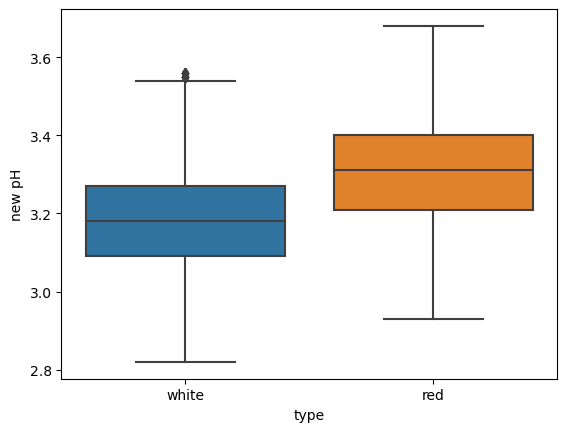

In [241]:
sns.boxplot( data=wineclean.loc[ (wineclean['type']=='white') | (wineclean['type'] == 'red'), : ]  , x="type" , y="new pH" )

In [182]:
#Limpiando valores apiticos - sulphates

In [186]:
w = wine.loc[(wine['type']=='red') | (wine['type']=='white'), ['sulphates']]

<AxesSubplot:xlabel='type', ylabel='sulphates'>

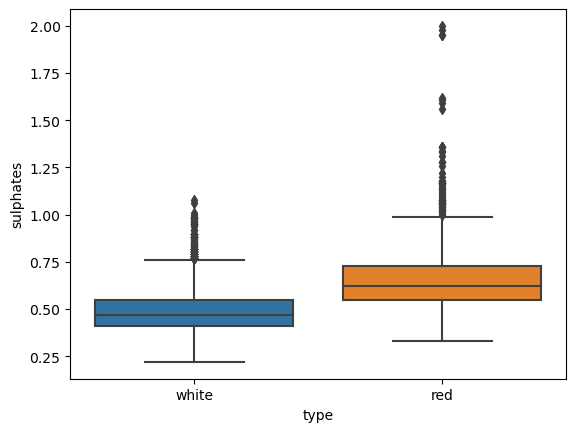

In [187]:
sns.boxplot( data=wine.loc[ (wine['type']=='white') | (wine['type'] == 'red'), : ]  , x="type" , y="sulphates" )

In [188]:
np.mean(w['sulphates'])

0.5312151547820744

In [189]:
q1 = np.quantile(w , 0.25 )
q3 = np.quantile(w , 0.75 )

In [190]:
q1

0.43

In [191]:
q3

0.6

In [192]:
iqr = q3 - q1

In [193]:
iqr

0.16999999999999998

In [194]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [195]:
upper_bound

0.855

In [196]:
lower_bound

0.175

In [197]:
w.loc[(w['sulphates'] > upper_bound) | (w['sulphates'] < lower_bound) , : ]

,sulphates
758,0.96
759,0.97
852,0.95
854,0.95
866,0.95
...,...
6373,0.88
6375,0.88
6414,0.97
6420,0.97


In [198]:
wq1 = wine.loc[ : , ["type","sulphates"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wq1.columns = ["type","sulphates q1"]

In [199]:
wq3 = wine.loc[ : , ["type","sulphates"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wq3.columns = ["type","sulphates q3"]

In [200]:
wmean = wine.loc[ : , ["type","sulphates"] ].groupby( ["type"] , as_index = False ).mean()
wmean.columns = ["type","sulphates mean"]

In [201]:
w_iqr = wq1.merge( wq3 , on=["type"] , how="inner" ).merge( wmean , on=["type"] , how="inner" )

In [202]:
w_iqr["iqr"] = w_iqr.apply( lambda r: r["sulphates q3"] - r["sulphates q1"] , axis = 1)

In [203]:
w_iqr["upper"] = w_iqr.apply( lambda r: ( r["sulphates q3"] + 1.5*r["iqr"] ) , axis = 1)
w_iqr["lower"] = w_iqr.apply( lambda r: ( r["sulphates q1"] - 1.5*r["iqr"] ) , axis = 1)

In [204]:
w_t6 = wine.merge(w_iqr , on=["type"] , how="left" ).copy()

In [205]:
def getsulphates(r):
    if ( r["sulphates"] <= r["lower"] ) | ( r["sulphates"] >= r["upper"] ):
        return r["sulphates mean"]
    else:
        return r["sulphates"]

In [206]:
w_t6['new sulphates'] = w_t6.apply( lambda r: getsulphates(r) , axis = 1 )

In [207]:
w_t6

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sulphates q1,sulphates q3,sulphates mean,iqr,upper,lower,new sulphates
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0.41,0.55,0.489851,0.14,0.76,0.20,0.450000
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0.41,0.55,0.489851,0.14,0.76,0.20,0.490000
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0.41,0.55,0.489851,0.14,0.76,0.20,0.440000
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.41,0.55,0.489851,0.14,0.76,0.20,0.400000
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0.41,0.55,0.489851,0.14,0.76,0.20,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0.55,0.73,0.657919,0.18,1.00,0.28,0.580000
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0.55,0.73,0.657919,0.18,1.00,0.28,0.531215
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0.55,0.73,0.657919,0.18,1.00,0.28,0.750000
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0.55,0.73,0.657919,0.18,1.00,0.28,0.710000


In [236]:
w_t6=w_t6.drop(['type', 'sulphates q1', 'sulphates q3', 'sulphates mean', 'iqr', 'upper', 'lower', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol', 'quality'], axis=1)

In [237]:
w_t6

,new sulphates
0,0.450000
1,0.490000
2,0.440000
3,0.400000
4,0.400000
...,...
6492,0.580000
6493,0.531215
6494,0.750000
6495,0.710000


<AxesSubplot:xlabel='type', ylabel='new sulphates'>

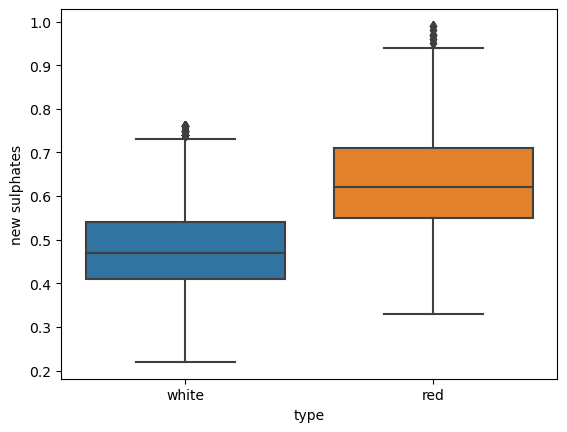

In [250]:
sns.boxplot( data=wineclean.loc[ (wineclean['type']=='white') | (wineclean['type'] == 'red'), : ]  , x="type" , y="new sulphates" )

In [249]:
# Concatenando dataset con datos limpios

In [238]:
wineclean = pd.concat([w_t, w_t1, w_t2, w_t3, w_t4, w_t5, w_t6], axis=1)

In [247]:
wineclean=wineclean.drop(['fixed acidity q1', 'fixed acidity q3', 'fixed acidity mean'], axis=1)

In [251]:
# Dataset con valores limpios

In [248]:
wineclean

,type,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,new fixed acidity,new volatile acidity,new citric acid,new residual sugar,new chlorides,new pH,new sulphates
0,white,45.0,170.0,1.00100,8.8,6,7.0,0.270,0.36,20.7,0.045,3.00,0.450000
1,white,14.0,132.0,0.99400,9.5,6,6.3,0.300,0.34,1.6,0.049,3.30,0.490000
2,white,30.0,97.0,0.99510,10.1,6,8.1,0.280,0.40,6.9,0.050,3.26,0.440000
3,white,47.0,186.0,0.99560,9.9,6,7.2,0.230,0.32,8.5,0.058,3.19,0.400000
4,white,47.0,186.0,0.99560,9.9,6,7.2,0.230,0.32,8.5,0.058,3.19,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,32.0,44.0,0.99490,10.5,5,6.2,0.600,0.08,2.0,0.090,3.45,0.580000
6493,red,39.0,51.0,0.99512,11.2,6,5.9,0.550,0.10,2.2,0.062,3.52,0.531215
6494,red,29.0,40.0,0.99574,11.0,6,6.3,0.510,0.13,2.3,0.076,3.42,0.750000
6495,red,32.0,44.0,0.99547,10.2,5,5.9,0.645,0.12,2.0,0.075,3.57,0.710000


In [291]:
# Ejercicio 2
# PCA

In [253]:
wine_c = wineclean.loc[:, ['new fixed acidity', 'new volatile acidity', 'new citric acid', 'new chlorides', 'new pH']].copy()

In [254]:
wine_c.corr()

,new fixed acidity,new volatile acidity,new citric acid,new chlorides,new pH
new fixed acidity,1.000000,0.271296,0.291702,0.506580,-0.157881
new volatile acidity,0.271296,1.000000,-0.399748,0.614307,0.301071
new citric acid,0.291702,-0.399748,1.000000,-0.113740,-0.315569
new chlorides,0.506580,0.614307,-0.113740,1.000000,0.249556
new pH,-0.157881,0.301071,-0.315569,0.249556,1.000000


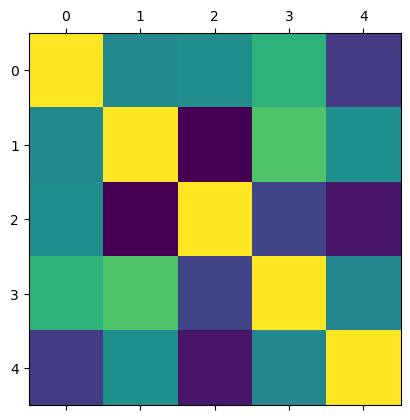

In [255]:
plt.matshow(wine_c.corr())

In [256]:
cols_to_use = ['new fixed acidity', 'new volatile acidity', 'new citric acid', 'new chlorides', 'new pH']

In [258]:
x = wineclean.loc[ : , cols_to_use ].values

In [259]:
x

array([[7.   , 0.27 , 0.36 , 0.045, 3.   ],
       [6.3  , 0.3  , 0.34 , 0.049, 3.3  ],
       [8.1  , 0.28 , 0.4  , 0.05 , 3.26 ],
       ...,
       [6.3  , 0.51 , 0.13 , 0.076, 3.42 ],
       [5.9  , 0.645, 0.12 , 0.075, 3.57 ],
       [6.   , 0.31 , 0.47 , 0.067, 3.39 ]])

In [260]:
x = StandardScaler().fit_transform(x)

In [261]:
x

array([[-0.12423514, -0.38729227,  0.38566201, -0.34065174, -1.43032692],
       [-0.74205214, -0.19004522,  0.22483801, -0.13405118,  0.57802229],
       [ 0.84662014, -0.32154325,  0.70731002, -0.08240103,  0.3102424 ],
       ...,
       [-0.74205214,  1.19068414, -1.46381405,  1.26050261,  1.38136197],
       [-1.09509043,  2.07829587, -1.54422606,  1.20885247,  2.38553658],
       [-1.00683086, -0.1242962 ,  1.27019404,  0.79565135,  1.18052705]])

In [262]:
x = np.around( x , 2 )

In [263]:
np.nan_to_num(x)

array([[-0.12, -0.39,  0.39, -0.34, -1.43],
       [-0.74, -0.19,  0.22, -0.13,  0.58],
       [ 0.85, -0.32,  0.71, -0.08,  0.31],
       ...,
       [-0.74,  1.19, -1.46,  1.26,  1.38],
       [-1.1 ,  2.08, -1.54,  1.21,  2.39],
       [-1.01, -0.12,  1.27,  0.8 ,  1.18]])

In [264]:
pca = PCA( n_components=2 )

In [265]:
principalComponents = pca.fit_transform(x)

In [268]:
principalComponents

array([[-1.08059402,  0.67383704],
       [-0.27112148, -0.63071303],
       [-0.10354254,  0.8208022 ],
       ...,
       [ 2.15999301, -1.61427969],
       [ 2.93753339, -2.36584765],
       [ 0.12339914, -0.22421801]])

In [266]:
pcadf = pd.DataFrame(data=principalComponents ,columns=['pc1','pc2'])

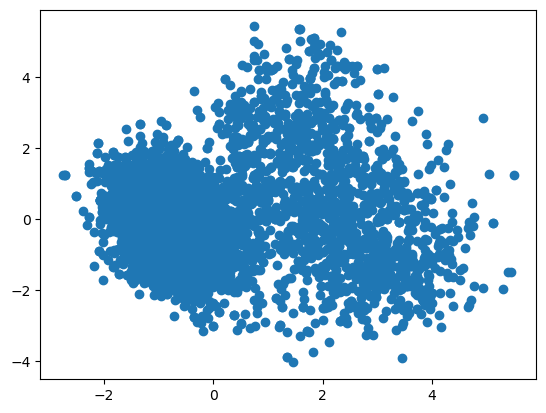

In [267]:
plt.scatter( pcadf['pc1'] , pcadf['pc2'] )

In [292]:
# Ejercicio 3
# Aplicando k-means

In [270]:
km = KMeans( n_clusters=3  ).fit(pcadf)

In [271]:
km.cluster_centers_

array([[-0.69162536, -0.14235944],
       [ 1.63234398,  2.40007965],
       [ 2.75708373, -0.95153762]])

In [272]:
km.labels_

array([0, 0, 0, ..., 2, 2, 0])

In [273]:
pcadf

,pc1,pc2
0,-1.080594,0.673837
1,-0.271121,-0.630713
2,-0.103543,0.820802
3,-0.259477,0.242684
4,-0.259477,0.242684
...,...,...
6492,3.104014,-1.825441
6493,2.100488,-2.470745
6494,2.159993,-1.614280
6495,2.937533,-2.365848


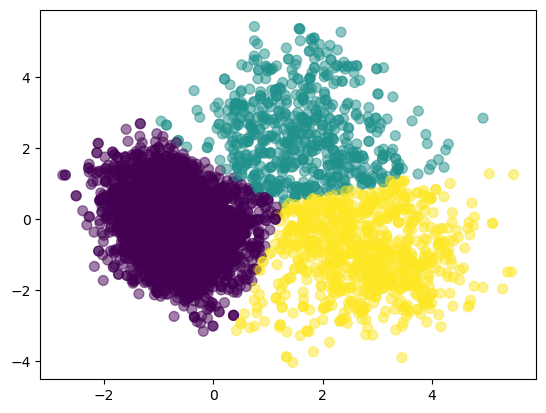

In [274]:
plt.scatter( pcadf['pc1'] , pcadf['pc2'] , c=km.labels_.astype(float) , s=50, alpha=0.5 )

In [400]:
# Cada perfil de vino en los grupos de colores representan el nivel de acidez citrica que hay en los vinos, por ejemplo,
# el perfil morado contiene el grupo de vinos donde el nivel de acidez citrica es alta en compararión al perfil amarillo que es baja
# y el perfil verde tiene un nivel que esta en ese intervalo intermedio de acidez citrica.

In [293]:
# Ejercicio 4
# Agreguando la nueva variable al dateset

In [282]:
wineclean['cluster'] = km.labels_

In [283]:
wineclean

,type,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,new fixed acidity,new volatile acidity,new citric acid,new residual sugar,new chlorides,new pH,new sulphates,cluster
0,white,45.0,170.0,1.00100,8.8,6,7.0,0.270,0.36,20.7,0.045,3.00,0.450000,0
1,white,14.0,132.0,0.99400,9.5,6,6.3,0.300,0.34,1.6,0.049,3.30,0.490000,0
2,white,30.0,97.0,0.99510,10.1,6,8.1,0.280,0.40,6.9,0.050,3.26,0.440000,0
3,white,47.0,186.0,0.99560,9.9,6,7.2,0.230,0.32,8.5,0.058,3.19,0.400000,0
4,white,47.0,186.0,0.99560,9.9,6,7.2,0.230,0.32,8.5,0.058,3.19,0.400000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,32.0,44.0,0.99490,10.5,5,6.2,0.600,0.08,2.0,0.090,3.45,0.580000,2
6493,red,39.0,51.0,0.99512,11.2,6,5.9,0.550,0.10,2.2,0.062,3.52,0.531215,2
6494,red,29.0,40.0,0.99574,11.0,6,6.3,0.510,0.13,2.3,0.076,3.42,0.750000,2
6495,red,32.0,44.0,0.99547,10.2,5,5.9,0.645,0.12,2.0,0.075,3.57,0.710000,2


In [288]:
# Eliminando las columnas que hayan formado parte de analisis del PCA

In [286]:
wineclean=wineclean.drop(['new fixed acidity', 'new volatile acidity', 'new citric acid', 'new chlorides', 'new pH'], axis=1)

In [287]:
wineclean

,type,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,new residual sugar,new sulphates,cluster
0,white,45.0,170.0,1.00100,8.8,6,20.7,0.450000,0
1,white,14.0,132.0,0.99400,9.5,6,1.6,0.490000,0
2,white,30.0,97.0,0.99510,10.1,6,6.9,0.440000,0
3,white,47.0,186.0,0.99560,9.9,6,8.5,0.400000,0
4,white,47.0,186.0,0.99560,9.9,6,8.5,0.400000,0
...,...,...,...,...,...,...,...,...,...
6492,red,32.0,44.0,0.99490,10.5,5,2.0,0.580000,2
6493,red,39.0,51.0,0.99512,11.2,6,2.2,0.531215,2
6494,red,29.0,40.0,0.99574,11.0,6,2.3,0.750000,2
6495,red,32.0,44.0,0.99547,10.2,5,2.0,0.710000,2


In [294]:
# Ejercicio 5
# Crear la varible de respuesta

In [330]:
wineclean['y']= 1

In [331]:
wineclean['y']=wineclean.apply(lambda r: r['y'] if r['quality'] >= 5 else 0, axis=1)

In [341]:
Y = wineclean['y'].values

In [342]:
# Ejercicio 6
# Eliminando la variable quality del dataset

In [343]:
wineclean = wineclean.drop(['quality'], axis=1)

In [344]:
wineclean

,type,free sulfur dioxide,total sulfur dioxide,density,alcohol,new residual sugar,new sulphates,cluster,y
0,white,45.0,170.0,1.00100,8.8,20.7,0.450000,0,1
1,white,14.0,132.0,0.99400,9.5,1.6,0.490000,0,1
2,white,30.0,97.0,0.99510,10.1,6.9,0.440000,0,1
3,white,47.0,186.0,0.99560,9.9,8.5,0.400000,0,1
4,white,47.0,186.0,0.99560,9.9,8.5,0.400000,0,1
...,...,...,...,...,...,...,...,...,...
6492,red,32.0,44.0,0.99490,10.5,2.0,0.580000,2,1
6493,red,39.0,51.0,0.99512,11.2,2.2,0.531215,2,1
6494,red,29.0,40.0,0.99574,11.0,2.3,0.750000,2,1
6495,red,32.0,44.0,0.99547,10.2,2.0,0.710000,2,1


In [345]:
# Ejercicio 7
# Aplicando los siguientes entrenamientos de MLS

In [346]:
#Regresion Logistica

In [348]:
from sklearn.model_selection import train_test_split

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

In [356]:
features_col = wineclean.columns.values[1:8]

In [357]:
X = wineclean[features_col].values

In [359]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=0)

In [393]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [394]:
y_pred  = log_model.predict(X_test)

In [395]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [396]:
Y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [397]:
log_model.predict_proba(X_test)[:] 

array([[0.03512384, 0.96487616],
       [0.06011634, 0.93988366],
       [0.03908613, 0.96091387],
       ...,
       [0.11186217, 0.88813783],
       [0.008251  , 0.991749  ],
       [0.05427371, 0.94572629]])

In [398]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

In [399]:
print(metrics.accuracy_score(Y_test,y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.9593846153846154
0.9593846153846154
1.0
0.9792713567839196


In [376]:
metrics.roc_auc_score(Y_test, y_pred)

0.5

In [369]:
# Neuronal Network

In [370]:
from sklearn.neural_network import MLPClassifier

In [371]:
x_train = X_train 
x_test = X_test
y_train = Y_train
y_test =  Y_test 

In [377]:
NN = MLPClassifier(random_state=1, max_iter=3000)

NN.fit(x_train, y_train)

y_pred = NN.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [378]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9593846153846154
0.9593846153846154
1.0
0.9792713567839196


In [379]:
# Arboles de desiciones

In [380]:
from sklearn import tree

In [381]:
tree_one = tree.DecisionTreeClassifier(random_state=1)

In [382]:
tree_one = tree_one.fit( x_train , y_train )

In [383]:
tree_one.tree_.max_depth

21

In [384]:
y_pred = tree_one.predict(x_test)

In [385]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.947076923076923
0.9694072657743786
0.9756254008980115
0.9725063938618927


In [387]:
# Random Forest

In [388]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train , y_train);

In [389]:
y_pred = rf.predict(x_test) >= 0.5

In [390]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9636923076923077
0.9646840148698885
0.9987171263630532
0.9814056098329657


In [392]:
# Ejercicio 8
# Explique cual de los entrenamientos fue el mejor?

In [ ]:
# Cabe mencionar que todos los entrenamientos tuvieron una presición muy alta, casi a 1 o sobreajustada. Pero el entrenamiento 
# (o los entrenamientos) que tienen una presición mas real, o que mas se ajustarían a los datos de prueba serían Regresion 
# Logistica o Redes Neuronales, a menudo son los mas usados.

Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?